# **Generacion de numeros**

In [3]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.stats import chisquare, ksone


# Generador Congruencial Lineal (GCL)
# Forma --> Xsub(n+1) = (a Xsub(n) + c) mod (m)
# Están determinados por los parámetros: * Módulo:  m > 0
# Multiplicador 0 <= a <= m
# Incremento c <= m
# Semilla 0 <= X sub0 <= m
class glc:

    numbers = []
    
    def __init__(self, seed: float, a: float, c: float, m: int, n: int) -> None :
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m
        self.n =n


    def generate(self):
        next = self.seed
        for i in range(self.n):
            next= ((self.a*next) + self.c)%self.m
            self.numbers.append(next/self.m)
        return self.numbers


# Generador Media de los Cuadrados
# Forma --> 
class media_cuadrados:

    def __init__(self, seed, n):
        self.seed = seed
        self.n = n

    def generate(self):
        seeds = []
        values = []
        values2 =[]
        seeds.append(self.seed)
        for i in range(self.n):
            values.append(seeds[i]**2)
            num=int(str(values[i]).zfill(8)[2:6])
            values2.append(float(f'0.{num}'))
            seeds.append(num)
        return values2


# Generador Números Pseudo Aleatorios de Numpy
# Forma --> 
def generadorNumpy(n):
   numbers = []
   for i in range(n):
       numbers.append(np.random.uniform(0, 1))
   return numbers


#Definición de variables
# n -> Cantidad de números pseudoaleatorios a generar
n=1000
seedGLC=6565
a=25214903917
c=11
m=2**48
seedMedia=7001
numbersGLC = glc(seedGLC, a, c, m, n).generate()
numbersMedia= media_cuadrados(seedMedia, n).generate()
numbersPython= generadorNumpy(n)
print('Numeros GLC')
print(numbersGLC)
print('Numeros Media')
print(numbersMedia)
print('Numeros Python')
print(numbersPython)


Numeros GLC
[0.5881014580748314, 0.8044771609978874, 0.9826694402862799, 0.9907164961877903, 0.36203023319745853, 0.12302048707520541, 0.42384474489180235, 0.17217280824802472, 0.09400848006505669, 0.22361428789150395, 0.6526485924659298, 0.5937091609888547, 0.9766568228290851, 0.5178718606189356, 0.8244783676435148, 0.7762270567713649, 0.26567126796167884, 0.16129229784084131, 0.6089603005984472, 0.8572835109605741, 0.4992920819064466, 0.7899447773126376, 0.6741177814186372, 0.21214513969094995, 0.7658459754089932, 0.15890933205889368, 0.379651975949848, 0.47461234357632875, 0.09932170233051352, 0.13677331230867296, 0.27302203902207367, 0.1650122403946348, 0.679622682945066, 0.27359386527316687, 0.14354557668504953, 0.8238791474828737, 0.0005332365746539836, 0.9949303928028534, 0.6270179936986224, 0.3408761130642013, 0.5142640184260046, 0.5820224130258644, 0.9876610385490991, 0.5799680574964476, 0.7020588631589533, 0.631257862664949, 0.9474702881943315, 0.032369322980304815, 0.8067260

# **Graficos**

Frecuencia absoluta intervalos: [105. 109. 110.  96.  82. 111.  94. 109.  94.  90.]
Cantidad intervalos:  10
Valor chi cuadrado de la muestra GLC: Power_divergenceResult(statistic=9.2, pvalue=0.41902116661019323)
PASA LA PRUEBA:
9.2
<
16.918977604620448
True
Frecuencia absoluta intervalos: [251.   3.   1. 248.   0. 247.   0. 248.   1.   1.]
Cantidad intervalos:  10
Valor chi cuadrado de la muestra Media Cuadrado: Power_divergenceResult(statistic=1470.3000000000002, pvalue=4.9791246004004e-311)
False
Frecuencia absoluta intervalos: [106. 104. 101.  83.  99.  95. 107. 106. 108.  91.]
Cantidad intervalos:  10
Valor chi cuadrado de la muestra Python: Power_divergenceResult(statistic=5.979999999999999, pvalue=0.7419183013841846)
PASA LA PRUEBA:
5.979999999999999
<
16.918977604620448
True


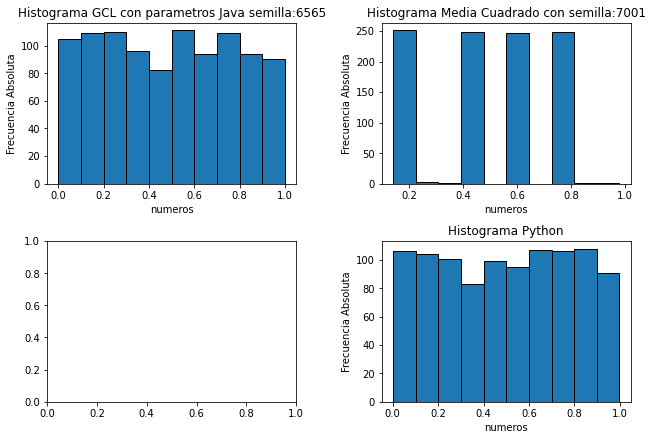

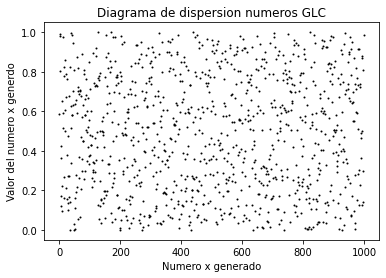

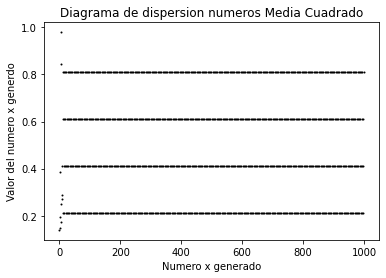

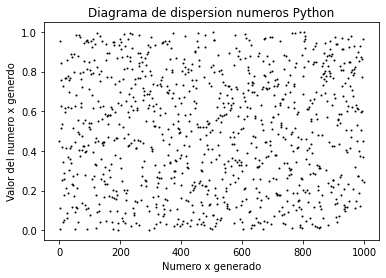

In [ ]:
#graficos

fig, axs = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=[9, 6])
 
 
axs[0, 0].set_title(f'Histograma GCL con parametros Java semilla:{seedGLC}')
axs[0, 0].set(xlabel='numeros', ylabel='Frecuencia Absoluta')
frec_absoluta,x,c= axs[0, 0].hist(numbersGLC,  edgecolor='black')
print('Frecuencia absoluta intervalos:',frec_absoluta)
k= len(frec_absoluta)
print('Cantidad intervalos: ', k)
frec_esp = []
for i in range(k):
    frec_esp.append(n/k)
chi2_num = chisquare(frec_absoluta, f_exp = frec_esp)
print('Valor chi cuadrado de la muestra GLC:',chi2_num)
chi2_table = ss.chi2.ppf(q=0.95, df=9)
if chi2_num[0] < chi2_table:
    resultado = True
    print('PASA LA PRUEBA:')
    print(chi2_num[0])
    print('<')
    print(chi2_table)
else:
    resultado = False
print(resultado)
#print('Valor chi cuadrado de la muestra GCL:',chisquare(frec_absoluta, f_exp = frec_esp))
#Si existe concordancia perfecta entre las frecuencias observadas y las esperadas el
#estadístico tomará un valor igual a 0; por el contrario, si existe una gran discrepancias
#entre estas frecuencias el estadístico tomará un valor grande y, en consecuencia,
#se rechazará la hipótesis nula
 
axs[0, 1].set_title(f'Histograma Media Cuadrado con semilla:{seedMedia}')
axs[0, 1].set(xlabel='numeros', ylabel='Frecuencia Absoluta')
frec_absoluta,x,c=axs[0, 1].hist(numbersMedia, edgecolor='black')
print('Frecuencia absoluta intervalos:',frec_absoluta)
k= len(frec_absoluta)
print('Cantidad intervalos: ', k)
frec_esp = []
for i in range(k):
    frec_esp.append(n/k)
chi2_num = chisquare(frec_absoluta, f_exp = frec_esp)
print('Valor chi cuadrado de la muestra Media Cuadrado:',chi2_num)
chi2_table = ss.chi2.ppf(q=0.95, df=9)
if chi2_num[0] < chi2_table:
    resultado = True
    print('PASA LA PRUEBA:')
    print(chi2_num[0])
    print('<')
    print(chi2_table)
else:
    resultado = False
print(resultado)

 
axs[1, 1].set_title('Histograma Python')
axs[1, 1].set(xlabel='numeros', ylabel='Frecuencia Absoluta')
frec_absoluta,x,c=axs[1, 1].hist(numbersPython, edgecolor='black')
print('Frecuencia absoluta intervalos:',frec_absoluta)
k= len(frec_absoluta)
print('Cantidad intervalos: ', k)
frec_esp = []
for i in range(k):
    frec_esp.append(n/k)
chi2_num = chisquare(frec_absoluta, f_exp = frec_esp)
print('Valor chi cuadrado de la muestra Python:',chi2_num)
chi2_table = ss.chi2.ppf(q=0.95, df=9)
if chi2_num[0] < chi2_table:
    resultado = True
    print('PASA LA PRUEBA:')
    print(chi2_num[0])
    print('<')
    print(chi2_table)
else:
    resultado = False
print(resultado)
plt.show()

#Diagramas de dispersion
plt.title("Diagrama de dispersion numeros GLC")
plt.ylabel("Valor del numero x generdo")
plt.xlabel("Numero x generado")
plt.scatter(range(n) , numbersGLC, c="black", s=1)
plt.show()

plt.title("Diagrama de dispersion numeros Media Cuadrado")
plt.ylabel("Valor del numero x generdo")
plt.xlabel("Numero x generado")
plt.scatter(range(n) , numbersMedia, c="black", s=1)
plt.show()

plt.title("Diagrama de dispersion numeros Python")
plt.ylabel("Valor del numero x generdo")
plt.xlabel("Numero x generado")
plt.scatter(range(n) , numbersPython, c="black", s=1)
plt.show()

# **Prueba Smirnof-Kolmogorov**

In [ ]:
from numpy.ma.core import sort
#Parámetros:
#numerosPseudoaleatorios -> lista con números aleatorios
#q -> intervalo de confianza (100 - %confianza)
#df -> grados de libertad
def ChiCuadradoTest(numerosPseudoaleatorios,q,df):
    '''
    '''
    numbers = numerosPseudoaleatorios
    #Frecuencia observada en intervalos definidos (bins)
    #np.histogram() -> Devuelve dos matrices: hist y bin_edges. 
    f_obs = np.histogram(numbers, bins=(0,1,2,3,4,5,6,7,8,9,10))

   #Frecuencia esperada en (bins) intervalos
    f_esp = len(numbers)/10

    #Realizo el cálculo y la sumatoria de la fórmula de chi2
    chi2_list = []
    for i in range(10):
        num = ((f_obs[0][i-1]- f_esp)**2)/f_esp
        chi2_list.append(num)
    # Al final obtengo un número de chi**2
    chi2_num = sum(chi2_list)


    # Este número lo debo comparar en la tabla de contingencia de chi2
    # Si es mayor al valor establecido en la tabla, dado un intervalo de confianza (q) y grados de libertad (df) -> entonces no cumple

    #Creo la tabla de chi2 dados tales parámetros q y df
    chi2_table = ss.chi2.ppf(q=q, df=df)

    if chi2_num < chi2_table:
        resultado = True
    else:
        resultado = False

    return  resultado, chi2_list, chi2_num

def CDF_KF(lista, numCompara):
  lista.sort()
  cdf=[i/len(lista) for i in lista if i<=numCompara]
  return cdf

def PruebaSminorfUniforme(lista, numCompara, alpha):
  stadistcs=[]
  for i in lista:
    cdf_unif=ss.uniform.cdf(x=numCompara, loc=0, scale=1)
    cdfLista=CDF_KF(lista, numCompara)

    lkmas=[]
    print(cdf_unif)
    for i in range(len(cdfLista)):
      lkmas.append(cdfLista[i]-cdf_unif)
    lkmenos=[]
    for i in range(len(cdfLista)):
      lkmenos.append(cdf_unif-cdfLista[i])

    k_mas=(len(lista)**0.5)*(max(lkmas))
    k_menos=(len(lista)**0.5)*(max(lkmenos))
    #stadistcs.append(abs(cdf_unif-cdfLista))
    maxim=max(k_mas,k_menos)
    k_tabla=ksone.ppf(1-alpha/2, 100)
    if maxim>k_tabla:
      return True
    return False
  


PruebaSminorfUniforme(numbersMedia,0.49,0.99)

0.49


True

# **Test de autocorrelacion**

In [6]:
from math import trunc, sqrt
from scipy.stats import norm

def test_autocorrelacion(lista, alfa, m, i):
  N=len(lista) #tamaño de la muestra
  #i=0 #primer elemento donde se busca correlacion
  #m=0 #se busca correlacion entre r_i y r_i+k*m
  #M=0 #M debe ser el mayor entero tal que i+(M+1)*m es menor que N
  M=trunc((N-(i+1))/m)-1
  if M<=0: return
  densidad=0
  densidad=sum([lista[(i+k*m)]*lista[i+(k+1)*m] for k in range(0,M+1)])/(M+1)
  desviacion=sqrt((13*M)+7)/(12*(M+1))
  significancia=(densidad-0.25)/desviacion
  if (abs(significancia)>1-norm.pdf(1-alfa/2)):
      #print(f'Son aleatorios')
      return True
  #print(f'No son aleatorios')
  return False


#l = [.12, .01, .23, .28, .89, .31, .64, .28, .83, .93, .99, .15, .33, .35, .91, .41, .6, .27, .75, .88, .68, .49, .05,
#    .43, .95, .58, .19, .36, .69, .87]
test_autocorrelacion(lista=numbersGLC, alfa=0.05, m=5, i=9)
test_autocorrelacion(lista=numbersMedia, alfa=0.05, m=5, i=10)
test_autocorrelacion(lista=numbersPython, alfa=0.05, m=5, i=15)


No son aleatorios
No son aleatorios
Son aleatorios


True

In [22]:
import numbers
def KolmogorovTest(lista, alfa):
    '''Test de Kolmogorov-Smirnov, compara el cdf(valor crítico) de una distribucion uniforme con el cdf(d) de la muestra(lista) de tamaño n, para el nivel de significancia alfa. Devuelde verdadero si la distribución es uniforme, falso si no lo es.'''

    lista.sort()  # Ordeno la lista de menor a mayor
    d_positivo = []  # array de los valores calculados para d positivo con la fórmula de KS
    d_negativo = []  # array de los valores calculados para d negativo con la fórmula de KS

    for i in range(len(lista)):
        # Fórmula de KS para d positivo
        d_positivo.append(i / len(lista) - lista[i])
        # Fórmula de KS para d negativo
        d_negativo.append(lista[i] - (i - 1) / len(lista))

    # Calculo el máximo entre los d
    dmaximo = max(max(d_positivo), max(d_negativo))
    # Tomo el valor crítico d de la tabla de KS
    k_tabla = ksone.ppf(1 - alfa / 2, len(lista))

    if dmaximo < k_tabla:  # Comparo el valor d de la muestra con el valor crítico de la tabla
        # Hipotesis aceptada, distribucion es uniforme
        return f'dmax:{dmaximo} k_tabla:{k_tabla} pasa prueba '
    # Hipótesis rechazada, distribucion no es uniforme
    return f'dmax:{dmaximo} k_tabla:{k_tabla} NO pasa prueba '


listan = [2, 9, 3, 1, 6, 3, 0, 4, 6, 3, 2, 8, 7, 0, 8, 1, 3, 1, 8, 3, 6, 0, 7, 9, 6, 1, 3, 4, 8, 6, 3, 4, 9, 1, 4, 2, 8, 1, 0,
          5, 5, 9, 2, 3, 1, 4, 0, 5, 8, 8, 9, 8, 3, 9, 9, 3, 3, 5, 9, 1, 1, 5, 3, 6, 8, 4, 7, 7, 9, 6, 0, 4, 0, 6, 0, 5, 7, 3,
          1, 5, 9, 5, 4, 0, 1, 4, 6, 0, 0, 5, 4, 6, 2, 4, 8, 4, 2, 0, 5, 4, 4, 1, 0, 2, 0, 5, 4, 1, 3, 7, 5, 3, 3, 1, 6, 7, 1,
          0, 2, 9, 6, 7, 0, 1, 7]


def generadorNumpy(n):
   numbers = []
   for i in range(n):
       numbers.append(np.random.uniform(0, 1))
   return numbers
listan=generadorNumpy(500)   
alfa=0.05
KolmogorovTest(listan, alfa)
test_autocorrelacion(alfa=0.05, m=12, i=3, lista=listan)


i=3, m=12 -->densidad=0.28139300241286375 significancia=0.6728103265824404 < z=0.8352198700196897 --> Hay correlacion
